In [131]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [132]:
def read_stats(rootdir):
    stat_files = []

    for file in os.listdir(rootdir):
        stat_files.append(os.fsdecode(rootdir + '/' + file))

    print(stat_files)
    raw_stats = []
    for file in stat_files:
        raw_stats.append(pickle.load(open(file, 'rb')))

    scores, survived, reward, time, steps = {}, {}, {}, {}, {}

    statistics = {}

    #N_gen = 100*int(stat_files[0][45]) + 10*int(stat_files[0][46]) + int(stat_files[0][47])
    N_gen = 100*int(stat_files[0][-18]) + 10*int(stat_files[0][-17]) + int(stat_files[0][-16])

    for gen in raw_stats:
        gen_score, gen_survived, gen_reward, gen_time, gen_steps = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])

        for ep in gen[0]:
            gen_score = np.append(gen_score, ep['score'])
            # gen_survived = np.append(gen_survived, ep['alive'])
            if ep['steps'] < 400:
                gen_survived = np.append(gen_survived, False)
            gen_reward = np.append(gen_reward, ep['reward'])
            gen_time = np.append(gen_time, ep['mean_time'])
            gen_steps = np.append(gen_steps, ep['steps'])

        scores[N_gen] = gen_score
        survived[N_gen] = gen_survived
        reward[N_gen] = gen_reward
        time[N_gen] = gen_time
        steps[N_gen] = gen_steps
        N_gen += 1
    
    return scores, survived, reward, time, steps

In [133]:
def get_xy(dictionary):
    y = []
    x = []
    for gen, val in dictionary.items():
        x.append(gen)
        y.append(np.mean(val))
    
    return x,y

In [134]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics1')
scores1, survived1, reward1, time1, steps1 = read_stats(rootdir)

['agent_code/my_agent/Training_data/statistics1/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/005_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/006_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/007_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/008_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/009_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/010_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/011_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/012_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/013_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/014_statistics.txt', 'agent_code/my_agent/Training_data/statistics1/

In [135]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics')
scores2, survived2, reward2, time2, steps2 = read_stats(rootdir)

['agent_code/my_agent/Training_data/statistics/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics/004_statistics.txt', 'agent_code/my_agent/Training_data/statistics/005_statistics.txt', 'agent_code/my_agent/Training_data/statistics/006_statistics.txt', 'agent_code/my_agent/Training_data/statistics/007_statistics.txt', 'agent_code/my_agent/Training_data/statistics/008_statistics.txt', 'agent_code/my_agent/Training_data/statistics/009_statistics.txt', 'agent_code/my_agent/Training_data/statistics/010_statistics.txt', 'agent_code/my_agent/Training_data/statistics/011_statistics.txt']


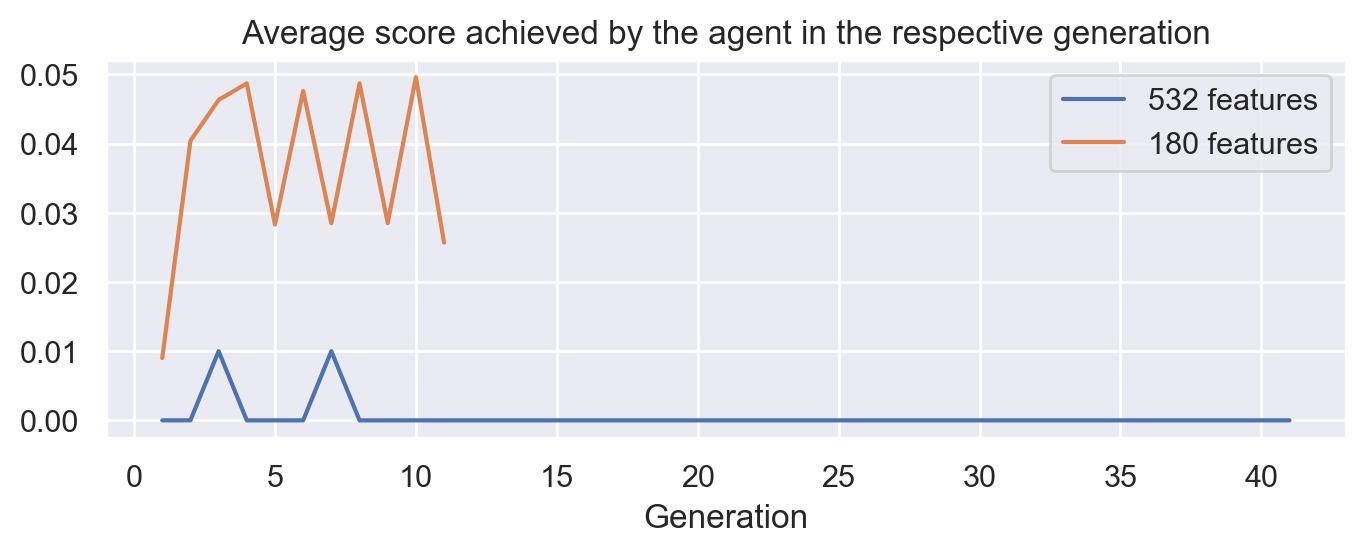

In [136]:
plt.figure(figsize=(8,2.5),dpi=200)
plt.title('Average score achieved by the agent in the respective generation')

x1, y1 = get_xy(scores1)
x2, y2 = get_xy(scores2)

plt.xlabel('Generation')
plt.plot(x1, y1, label='532 features')
plt.plot(x2, y2, label='180 features')
plt.legend()
plt.show()

In [137]:
print(y2)

[0.009, 0.0404, 0.0463, 0.0487, 0.0283, 0.0476, 0.0285, 0.0487, 0.0285, 0.0496, 0.0257]


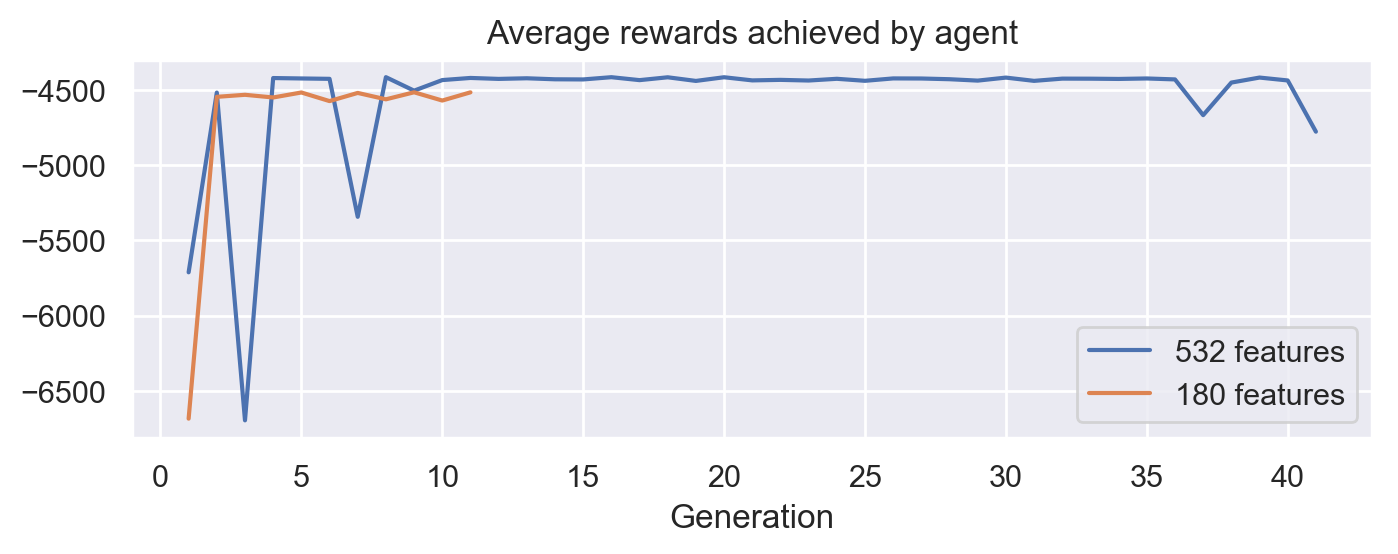

In [138]:
#scores, survived, reward, time, steps
plt.figure(figsize=(8,2.5),dpi=200)
plt.title('Average rewards achieved by agent')

x1, y1 = get_xy(reward1)
x2, y2 = get_xy(reward2)

plt.xlabel('Generation')
plt.plot(x1, y1, label='532 features')
plt.plot(x2, y2, label='180 features')
plt.legend()
plt.show()

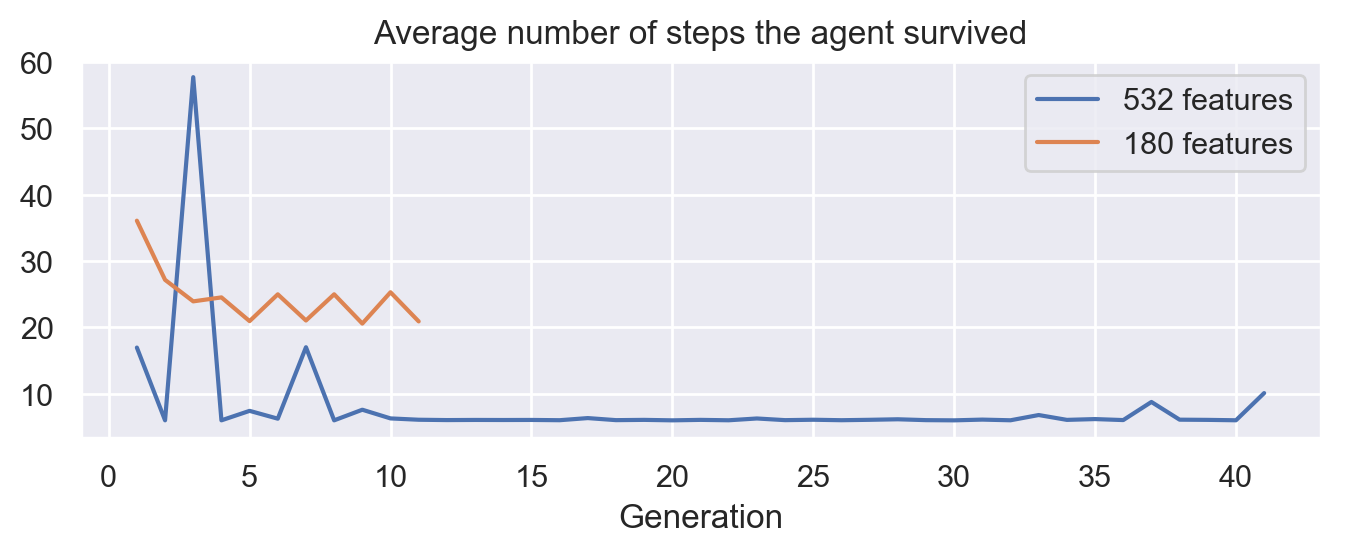

In [139]:
#scores, survived, reward, time, steps
plt.figure(figsize=(8,2.5),dpi=200)
plt.title('Average number of steps the agent survived')

x1, y1 = get_xy(steps1)
x2, y2 = get_xy(steps2)

plt.xlabel('Generation')
plt.plot(x1, y1, label='532 features')
plt.plot(x2, y2, label='180 features')
plt.legend()
plt.show()

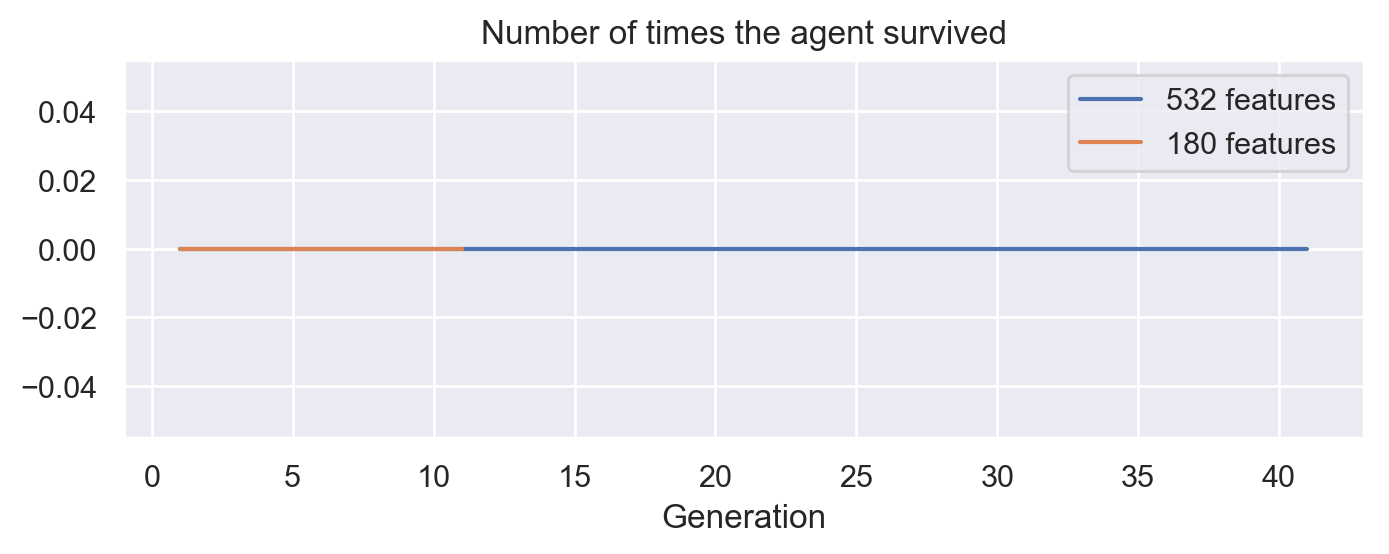

In [140]:
#scores, survived, reward, time, steps
plt.figure(figsize=(8,2.5),dpi=200)
plt.title('Number of times the agent survived')

x1, y1 = get_xy(survived1)
x2, y2 = get_xy(survived2)

plt.xlabel('Generation')
plt.plot(x1, y1, label='532 features')
plt.plot(x2, y2, label='180 features')
plt.legend()
plt.show()

In [141]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/trees')

stat_files = []

for file in os.listdir(rootdir):
    stat_files.append(os.fsdecode(rootdir + '/' + file))
    
print(stat_files[-5])
regressor_BOMB = pickle.load(open(stat_files[-6], 'rb'))
regressor_DOWN = pickle.load(open(stat_files[-5], 'rb'))
regressor_LEFT = pickle.load(open(stat_files[-4], 'rb'))
regressor_RIGHT = pickle.load(open(stat_files[-3], 'rb'))
regressor_UP = pickle.load(open(stat_files[-2], 'rb'))
regressor_WAIT = pickle.load(open(stat_files[-1], 'rb'))
print('regressors loaded')

agent_code/my_agent/Training_data/trees/011_DOWN.txt
regressors loaded


In [142]:
print(np.argsort(regressor_BOMB.feature_importances_))
print(np.argsort(regressor_WAIT.feature_importances_))

[  1 178 126 164 119  49  80  53  77  87  71  43  68  94  15 167  40  52
  34  64 124  37  92  31  18  62  56 148  32 114  98  83 120  41  93   6
 157  66 137  33 134  17  23 110  69  58 118 144 146  96  48  81  57 145
  86  35 101  85  28  76 122  74  70 136 149  19  84  39  73 121 142  72
 135   9  61  91  54  26 100  25 132 102  88 155   4  51 147 108 133  38
  65  82  75  16 168 111 127 117  20 166  29 150  59  97 143   3  30  46
 156 116  63 165 104 160   7 162  42  50 170  78 154 107  79  44 141 169
 138   5 113  45   8 173  67 129 153  12 131  36  90 130 106  21  89 172
   2 140 171  99  24  22 159 139 174 158  13 151 161 163  14  11   0  10
 175 179 125 103  60  55 109 112 105 123  47  95 152 128  27 115 177 176]
[178  79  65 109 105 110  55  80 127  63 113 108  17  96 103  29  98  86
  13  27 102  91  93  28  85  74 123 121 155 128  97 126 101  51  81 104
 134  76 122  77  72  67 106 168  49  64  78 170 144 118  58  59  60  52
  56 124 146 132  57  41  50 125  83  89  40  44  

In [143]:
import numpy as np

tester = np.arange(5)
gammas = 0.9**np.arange(tester.shape[0])
output = []
for y in range(tester.shape[0]):
    output.append(np.sum(tester[y:]*gammas[:tester.shape[0]-y]))

print (tester)
print (output)
print (0.9+0.9**2*2+0.9**3*3+0.9**4*4)

[0 1 2 3 4]
[7.3314, 8.146, 7.94, 6.6, 4.0]
7.3314
